# Ejercicios Clase 16/09/2016

Instead of implementing these algorithms from scratch, we could also use scikit-learn's linear regression function. Let's apply scikit-learn's linear regressio algorithm to the data

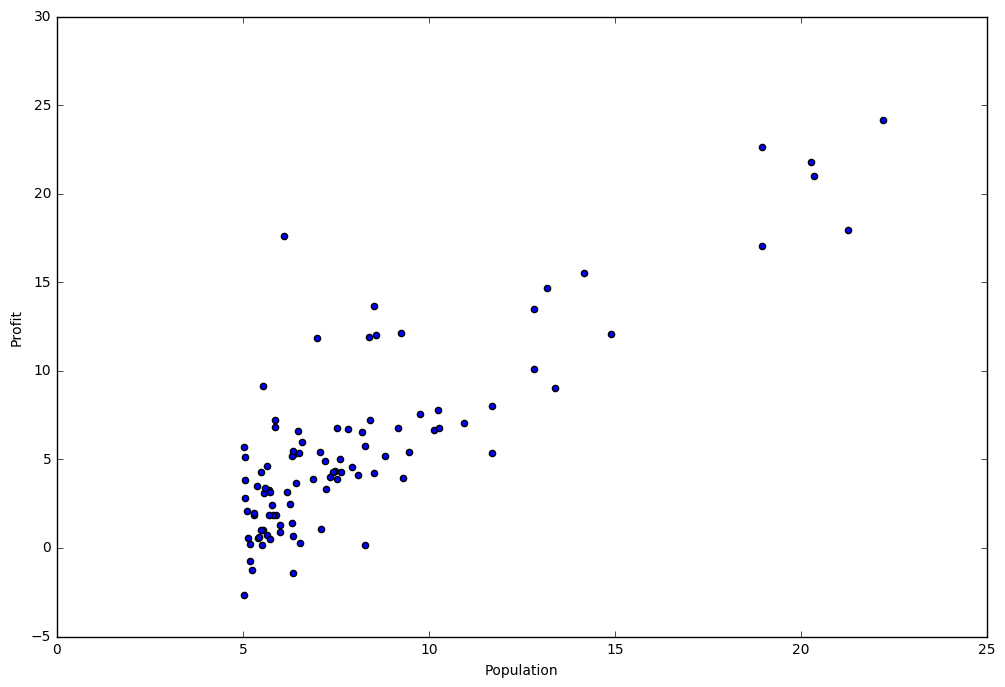

In [4]:
import pandas as pd
%matplotlib inline
path ='/home/ezequiel/PycharmProjects/curso_astroestadistica/ex1data1.txt'
data = pd.read_csv(path, header=None, names=['Population', 'Profit'])
data.plot(kind='scatter', x='Population', y='Profit', figsize=(12,8))

In [ ]:
# set X (training data) and y (target variable)
cols = data.shape[1]
X = data.iloc[:,0:cols-1]
y = data.iloc[:,cols-1:cols]

In [23]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X, y)

print('Weight coefficients: ', regressor.coef_)
print('y-axis intercept: ', regressor.intercept_)

Weight coefficients:  [[ 1.19303364]]
y-axis intercept:  [-3.89578088]


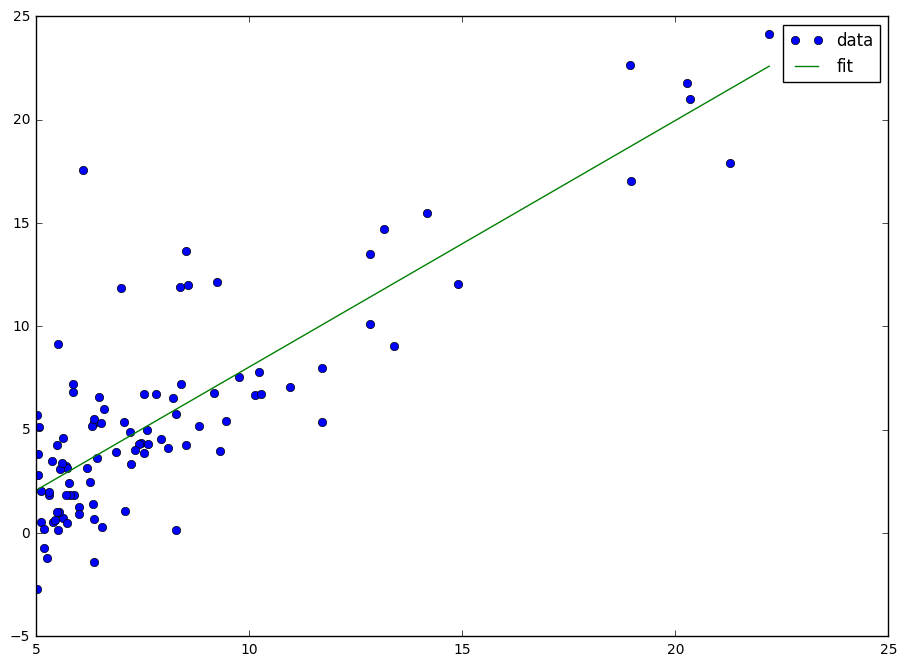

In [35]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(11,8))
ax = fig.gca()

ax.plot(X,y,'o',label="data")

min_x_pt = X.min()
max_x_pt = X.max()
min_y_pt = regressor.coef_[0,0]*min_x_pt+regressor.intercept_[0]
max_y_pt = regressor.coef_[0,0]*max_x_pt+regressor.intercept_[0]

ax.plot([min_x_pt,max_x_pt],[min_y_pt,max_y_pt],label='fit')

plt.legend(loc='best')
plt.show();

## Linear regression with multiple variables

In [8]:
path = '/home/ezequiel/PycharmProjects/curso_astroestadistica/ex1data2.txt'
data2 = pd.read_csv(path, header=None, names=['Size', 'Bedrooms', 'Price'])
data2.head()

<div>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>Size</th>
      <th>Bedrooms</th>
      <th>Price</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>2104</td>
      <td>3</td>
      <td>399900</td>
    </tr>
    <tr>
      <th>1</th>
      <td>1600</td>
      <td>3</td>
      <td>329900</td>
    </tr>
    <tr>
      <th>2</th>
      <td>2400</td>
      <td>3</td>
      <td>369000</td>
    </tr>
    <tr>
      <th>3</th>
      <td>1416</td>
      <td>2</td>
      <td>232000</td>
    </tr>
    <tr>
      <th>4</th>
      <td>3000</td>
      <td>4</td>
      <td>539900</td>
    </tr>
  </tbody>
</table>
</div>

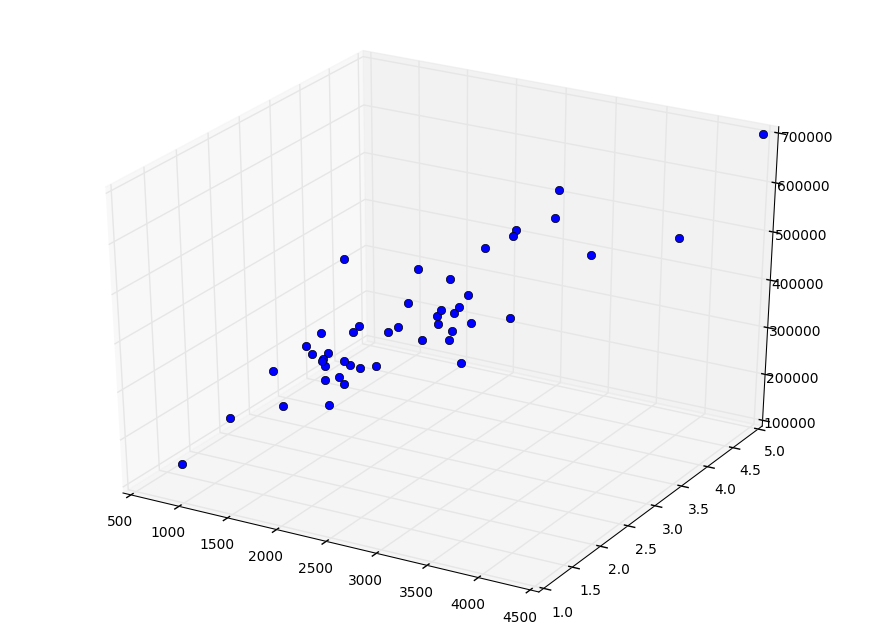

In [6]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(11,8))
ax = fig.gca(projection='3d')

cols = data2.shape[1]
X = data2.iloc[:,0:cols-1]
Y = data2.iloc[:,cols-1:cols]

ax.plot(X.iloc[:,0], X.iloc[:,1], Y.iloc[:,0], 'o')

plt.show();

In [9]:
# normalizing the features.
datanorm = (data2 - data2.mean()) / data2.std()
datanorm.head()

<div>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>Size</th>
      <th>Bedrooms</th>
      <th>Price</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>0.130010</td>
      <td>-0.223675</td>
      <td>0.475747</td>
    </tr>
    <tr>
      <th>1</th>
      <td>-0.504190</td>
      <td>-0.223675</td>
      <td>-0.084074</td>
    </tr>
    <tr>
      <th>2</th>
      <td>0.502476</td>
      <td>-0.223675</td>
      <td>0.228626</td>
    </tr>
    <tr>
      <th>3</th>
      <td>-0.735723</td>
      <td>-1.537767</td>
      <td>-0.867025</td>
    </tr>
    <tr>
      <th>4</th>
      <td>1.257476</td>
      <td>1.090417</td>
      <td>1.595389</td>
    </tr>
  </tbody>
</table>
</div>

In [15]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X, Y)

print('Weight coefficients: ', regressor.coef_)
print('y-axis intercept: ', regressor.intercept_)

Weight coefficients:  [[  139.21067402 -8738.01911233]]
y-axis intercept:  [ 89597.9095428]


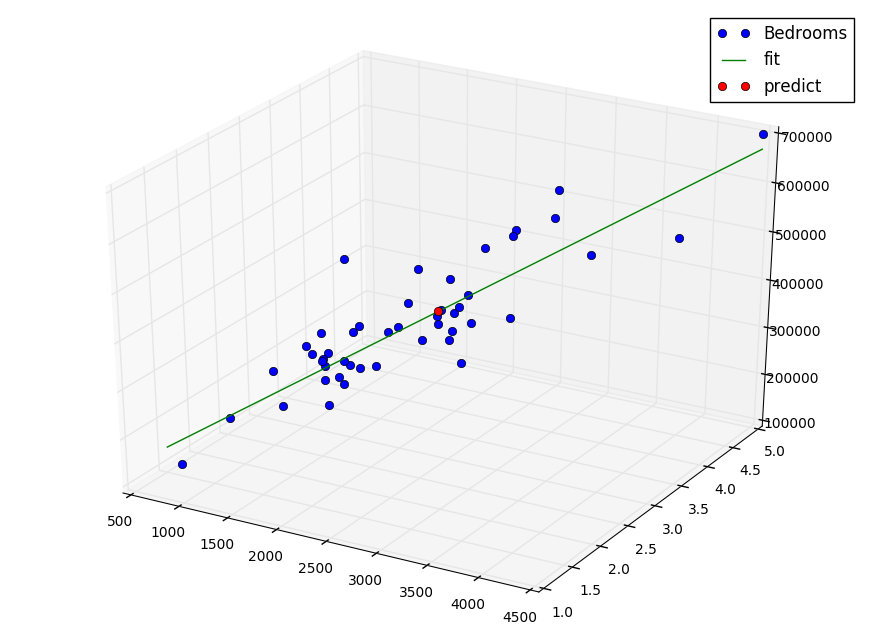

In [21]:
#No hace falta desnormalizar porque al ser lineal los coeficientes escalan los valores reales
min_x_pt = X.iloc[:,0].min()
max_x_pt = X.iloc[:,0].max()

min_y_pt = X.iloc[:,1].min()
max_y_pt = X.iloc[:,1].max()

min_z_pt = min_x_pt*regressor.coef_[0,0]+min_y_pt*regressor.coef_[0,1]+regressor.intercept_[0]
max_z_pt = max_x_pt*regressor.coef_[0,0]+max_y_pt*regressor.coef_[0,1]+regressor.intercept_[0]

fig = plt.figure(figsize=(11,8))
ax = fig.gca(projection='3d')


ax.plot(X.iloc[:,0], X.iloc[:,1], Y.iloc[:,0], 'o')
ax.plot([min_x_pt,max_x_pt], [min_y_pt,max_y_pt], [min_z_pt,max_z_pt], label='fit')
#Estimacion de f(2400,3)
ax.plot([2400], [3], [2400*regressor.coef_[0,0]+3*regressor.coef_[0,1]+regressor.intercept_[0]], 'o', label='predict')
plt.legend(loc='best')
plt.show();